In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [3]:
# checking for missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# checking the data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we can see, minimum value for "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI" is 0, but this can not be possible. Probably, 0 is for missing values.

In [6]:
# Checking number of missing values for these columns
columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in columns:
    print("missing values in",i," :",(data[i] == 0).sum())

missing values in Glucose  : 5
missing values in BloodPressure  : 35
missing values in SkinThickness  : 227
missing values in Insulin  : 374
missing values in BMI  : 11


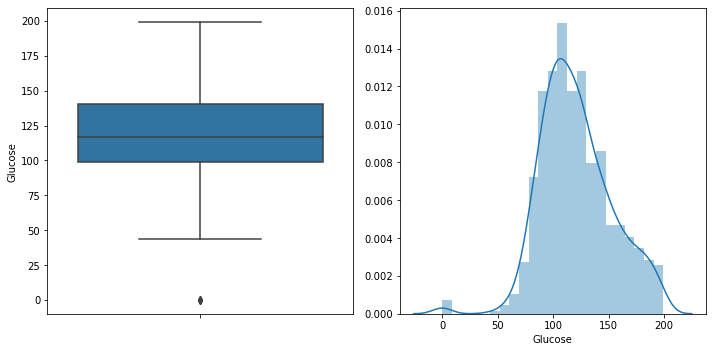

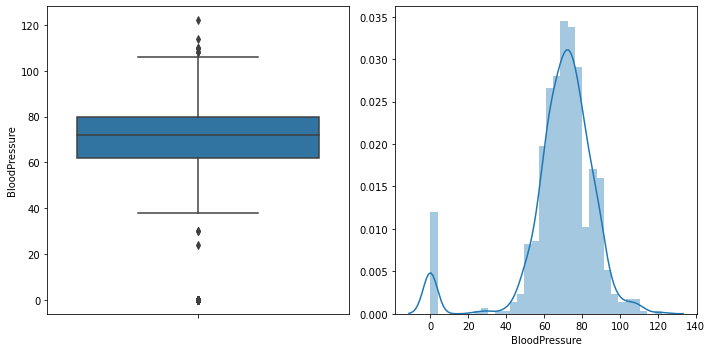

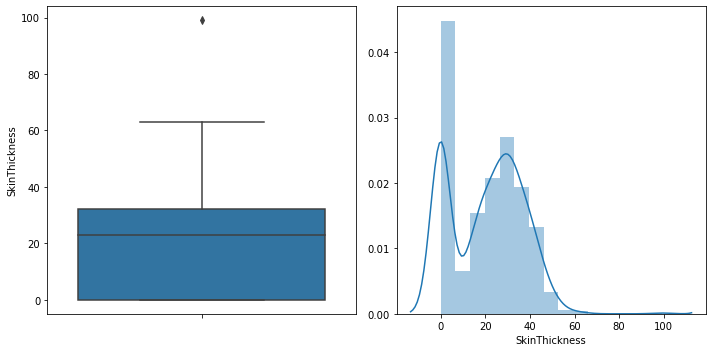

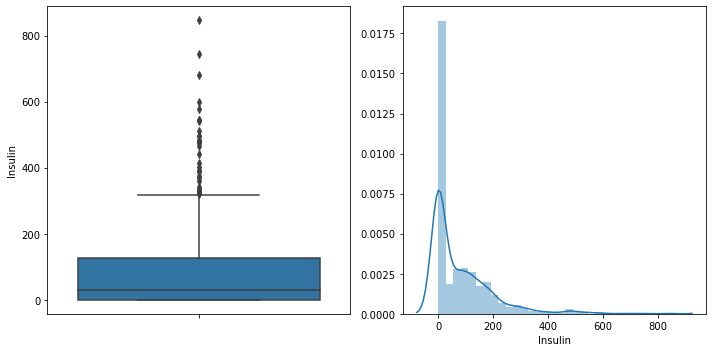

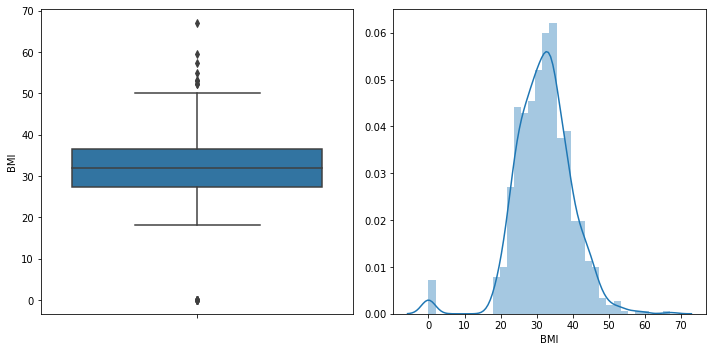

In [7]:
# Checking outliers and distribution of these columns for imputation
for i in columns:
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    sns.boxplot(x=data[i],orient = 'v',ax = axes[0])
    sns.distplot(data[i],ax = axes[1])
    fig.tight_layout()
    

Looking at the outliers and distribution, we can impute the missing values in "Glucose", "BloodPressure" and "BMI" with "mean" value and "SkinThickness" and "Insulin" with "median" value.

In [8]:
# imputing missing values i.e. '0'
data['Glucose'].replace(0,data['Glucose'].mean(),inplace = True)
data['BloodPressure'].replace(0,data['BloodPressure'].mean(),inplace = True)
data['BMI'].replace(0,data['BMI'].mean(),inplace = True)
data['SkinThickness'].replace(0,data['SkinThickness'].median(),inplace = True)
data['Insulin'].replace(0,data['Insulin'].median(),inplace = True)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We have successfully imputed missing value.

Now let's check the outliers in our data and how to handle them.

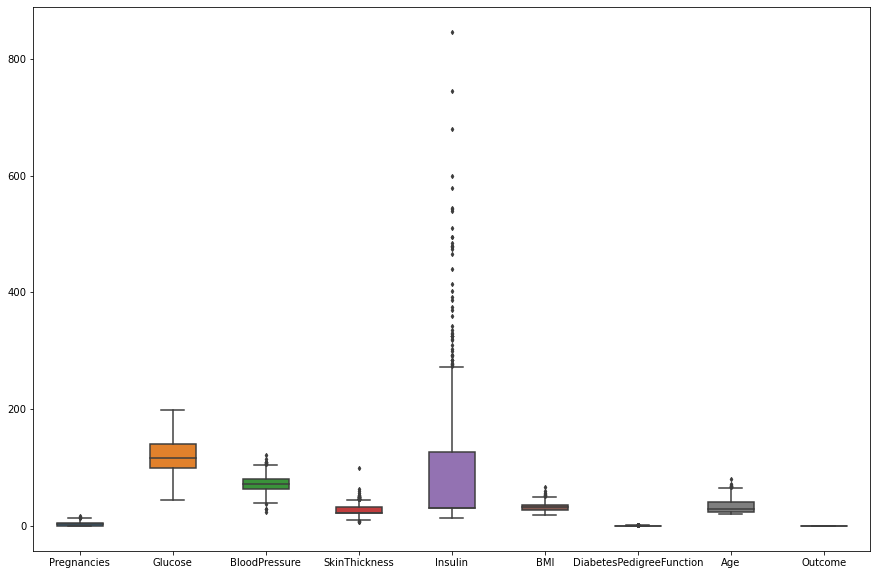

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

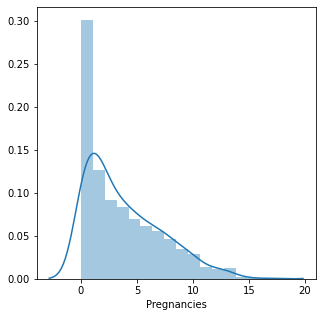

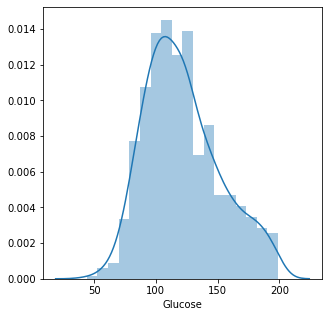

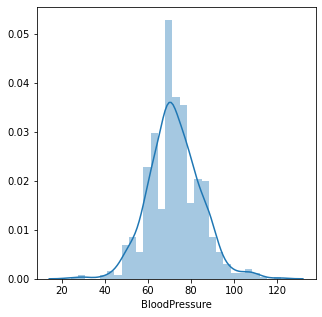

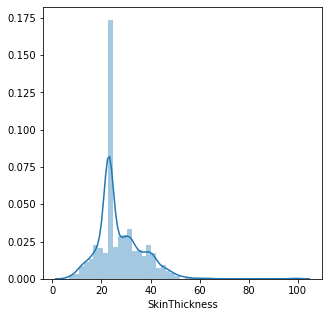

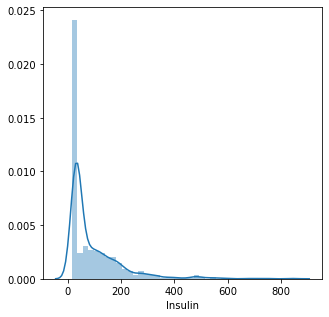

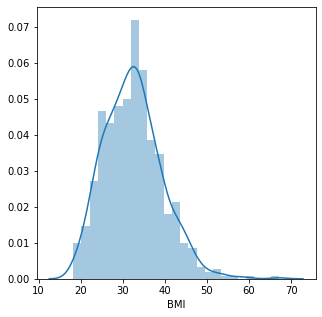

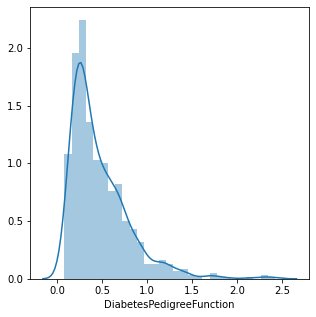

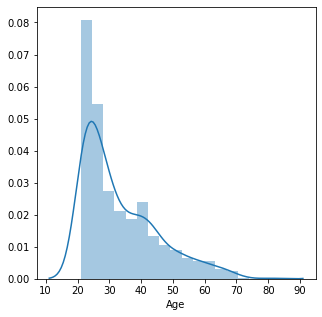

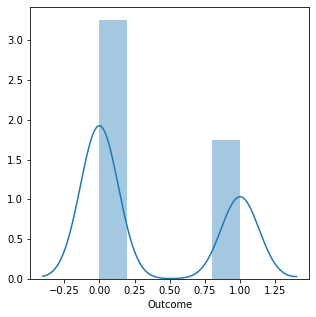

In [11]:
for i in data.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(data[i])

Looking at the outliers in some specific columns and their distribution, outliers are removed

In [12]:
# removing outliers
data = data[data['SkinThickness']<80]
data = data[data['Insulin']<580]
data = data[data['BMI']<60]
data.shape

(762, 9)

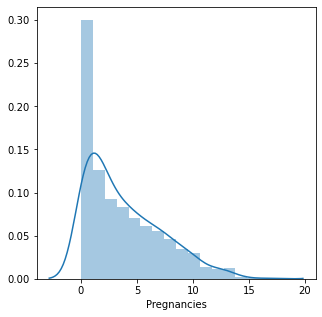

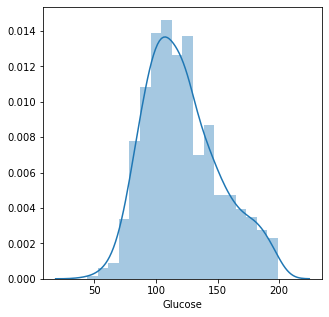

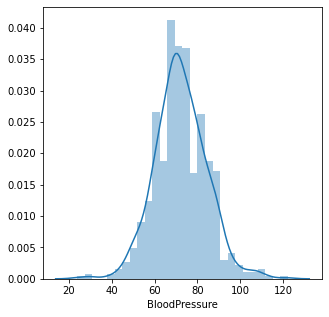

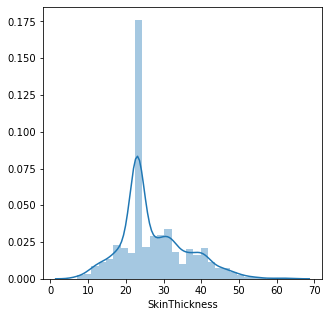

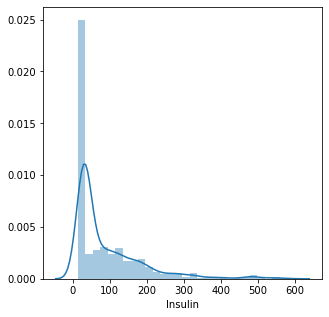

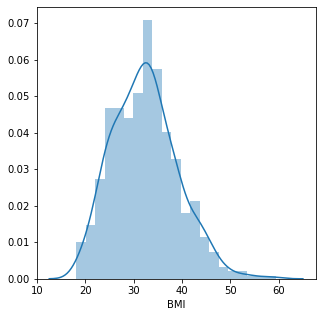

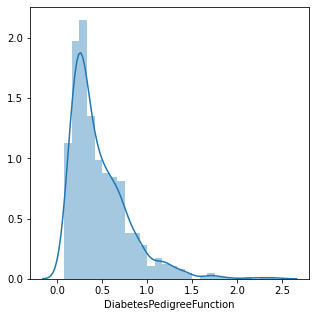

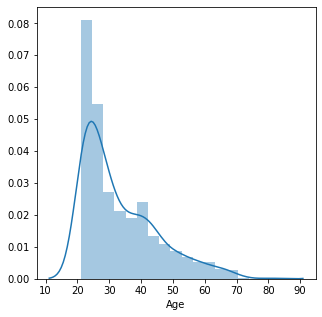

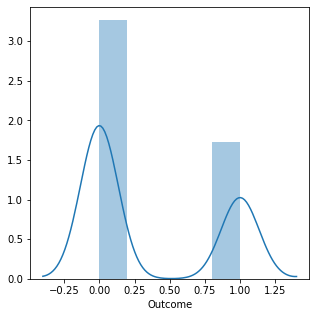

In [13]:
# Looking at the distribution again 
for i in data.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(data[i])

Now, data distribution looks better than before.

In [14]:
# separating dependent and independent features
X = data.drop("Outcome",axis=1)
y = data['Outcome']

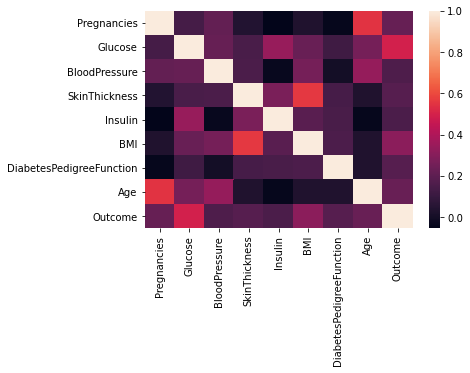

In [15]:
# heatmap for checking correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix)

There's not much correlation in the data. Hence, no problem of multicollinearity

# Standard Scaling

In [16]:
# scaling the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [37]:
# splitting training and test data (70:30) ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state = 30)

# Support Vector Classifier

In [38]:
from sklearn.svm import SVC
clf_svm1 = SVC()
clf_svm1.fit(X_train,y_train)
y_pred = clf_svm1.predict(X_test)

In [39]:
# accuracy of SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
print("SVC Accuracy:",accuracy)

SVC Accuracy: 0.7712418300653595


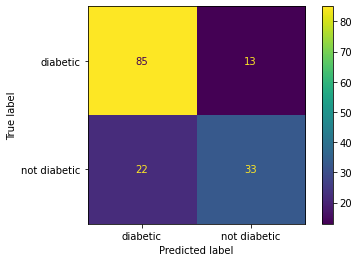

In [40]:
# plotting the confusion matrix 
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_svm1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [41]:
# selecting different parameters to use for improving the SVC Accuracy
param_grid = [
    {'C' : [0.5,1,10,100],
     'gamma' : ['scale','auto',1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear','poly','rbf']}
]

In [42]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV

optimal_params = GridSearchCV(SVC(),param_grid,cv = 5,scoring = 'accuracy',verbose = 2)
optimal_params.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.5, gamma=scale, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=poly .................................
[CV] .................. C=0.5, gamma=scale, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=poly .................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.5, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] ................. C=0.5, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] ................. C=0.5, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] ................. C=0.5, gamma=auto, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=auto, kernel=linear ................................
[CV] .

[CV] ................... C=0.5, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.5, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV] ................ C=0.5, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] ..................... C=1, gamma=auto, kernel=poly, total=   0.0s
[CV] C=1, gamma=auto, kernel=poly ....................................
[CV] ..................... C=1, gamma=auto, kernel=poly, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=auto, kernel=rbf .....................................
[CV] ...................... C=1, gamma=auto, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] .

[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=poly ..................................
[CV] .

[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ................... C=10, gamma=0.1, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] ................ C=100, gamma=scale, kernel=linear, total=   0.4s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ................ C=100, gamma=scale, kernel=linear, total=   0.4s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ................ C=100, gamma=scale, kernel=linear, total=   0.3s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ................ C=100, gamma=scale, kernel=linear, total=   0.7s
[CV] C=100, gamma=scale, kernel=linear ...............................
[CV] ................ C=100, gamma=scale, kernel=linear, total=   0.3s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] .................. C=100, gamma=scale, kernel=poly, total=   0.3s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] .................. C=100, gamma=scale, kernel=poly, total=   0.2s
[CV] C=100, gamma=scale, kernel=poly .................................
[CV] .

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.4s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.6s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] ................. C=100, gamma=0.01, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 420 out of 420 | elapsed: 25.7min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                    0.0001],
                          'kernel': ['linear', 'poly', 'rbf']}],
             scoring='accuracy', verbose=2)

In [43]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.7652215146999053


In [48]:
clf_svm2 = SVC(C = 100, gamma = 0.0001,probability = True)
clf_svm2.fit(X_train,y_train)
svm_y_pred = clf_svm2.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy = accuracy_score(y_test,svm_y_pred)
print("SVC Accuracy score:",accuracy)

SVC Accuracy score: 0.7843137254901961


In [85]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,svm_y_pred)
f1

0.6451612903225806

Accuracy is improved 

In [50]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        98
           1       0.79      0.55      0.65        55

    accuracy                           0.78       153
   macro avg       0.79      0.73      0.75       153
weighted avg       0.79      0.78      0.77       153



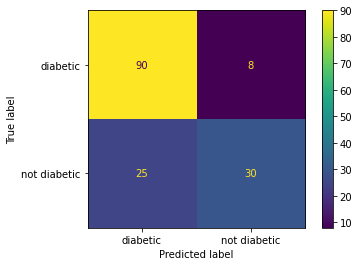

In [51]:
# plotting confusion matrix again
plot_confusion_matrix(clf_svm2,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
lr_clf1 = LogisticRegression()
lr_clf1.fit(X_train,y_train)
lr_y_pred = lr_clf1.predict(X_test)

In [53]:
accuracy_lr = accuracy_score(y_test,lr_y_pred)
print("Logistic Regression Accuracy:",accuracy_lr)

Logistic Regression Accuracy: 0.7843137254901961


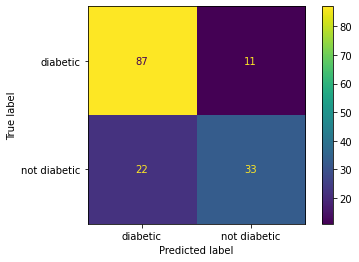

In [54]:
# Plotting confusion matrix
plot_confusion_matrix(lr_clf1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [55]:
# # Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr_optimal_params = GridSearchCV(LogisticRegression(),grid_values,cv =5,verbose = 2)
lr_optimal_params.fit(X_train,y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .............................. C=0.001, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............................... C=0.01, penalty=l2, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ................................ C=0.1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .................................. C=1, penalty=l2, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             verbose=2)

In [56]:
print(lr_optimal_params.best_params_)
print(lr_optimal_params.best_score_)

{'C': 1, 'penalty': 'l2'}
0.76358217043761


In [57]:
lr_clf2 = LogisticRegression(C = 1, penalty = 'l2')
lr_clf2.fit(X_train,y_train)
lr_y_pred = lr_clf2.predict(X_test)
accuracy = accuracy_score(y_test,lr_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


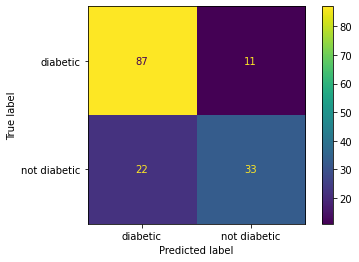

In [58]:
plot_confusion_matrix(lr_clf2,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [59]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        98
           1       0.75      0.60      0.67        55

    accuracy                           0.78       153
   macro avg       0.77      0.74      0.75       153
weighted avg       0.78      0.78      0.78       153



# Random Forest Classifier

In [60]:
# applying random forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 32)
model = rf_clf.fit(X_train,y_train)
rf_y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,rf_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


In [61]:
params = [{
    'n_estimators' : [10,20,50,100,200,300,400],
    'criterion' : ['gini','entropy'],
    'max_leaf_nodes' : range(8,32)
}]
optimal_params = GridSearchCV(RandomForestClassifier(random_state = 32),params,cv =5,verbose = 2)
optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=10 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=10 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=10 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=10 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=10 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=20 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=20 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=20 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=20 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=20 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=50 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=50 ...............
[CV]  criterion=gini, max_leaf_nodes=8, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_leaf_nodes=8, n_estimators=50 ...............
[CV]  

[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=300 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=400 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=400 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=400 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=400 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=9, n_estimators=400 ..............
[CV]  criterion=gini, max_leaf_nodes=9, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=10, n_estimators=10 ..............

[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=11, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=11, n_estimators=200 ......

[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=50 ..............
[CV]  criterion=gini, max_leaf_nodes=13, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_leaf_nodes=13, n_estimators=50 ..............

[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=400, total=   1.3s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=14, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=14, n_estimators=400 ......

[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=16, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=16, n_estimators=200 ......

[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=10 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=18, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=18, n_estimators=50 ..............

[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=19, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=19, n_estimators=400 ......

[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=21, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=21, n_estimators=200 ......

[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=50 ..............
[CV]  criterion=gini, max_leaf_nodes=23, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_leaf_nodes=23, n_estimators=50 ..............

[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=24, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=24, n_estimators=400 ......

[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=26, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=26, n_estimators=200 ......

[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=20 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=20, total=   0.1s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=50 ..............
[CV]  criterion=gini, max_leaf_nodes=28, n_estimators=50, total=   0.2s
[CV] criterion=gini, max_leaf_nodes=28, n_estimators=50 ..............

[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=300, total=   1.0s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=300 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=300, total=   1.1s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=400, total=   1.5s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=400 .............
[CV]  criterion=gini, max_leaf_nodes=29, n_estimators=400, total=   1.4s
[CV] criterion=gini, max_leaf_nodes=29, n_estimators=400 ......

[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=100, total=   0.3s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=100 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=200 .............
[CV]  criterion=gini, max_leaf_nodes=31, n_estimators=200, total=   0.7s
[CV] criterion=gini, max_leaf_nodes=31, n_estimators=200 ......

[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=20 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=20 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=20 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=20 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=20 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=50 ............
[CV]  criterion=entropy, max_leaf_nodes=9, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=9, n_estimators=5

[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=10, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=10, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=10,

[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=12, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=12, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=12, n_

[CV]  criterion=entropy, max_leaf_nodes=13, n_estimators=400, total=   1.4s
[CV] criterion=entropy, max_leaf_nodes=13, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=13, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=14, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=14, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=14, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=14, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=14, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=14, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=14, n_es

[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=200, total=   0.7s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=15, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=15, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=15,

[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=17, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=17, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=17, n_esti

[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=400, total=   1.6s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=18, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=18, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=19,

[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=20, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=20, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=20,

[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=22, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=22, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=22, n_esti

[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=300, total=   1.0s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=300, total=   1.1s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=400, total=   1.4s
[CV] criterion=entropy, max_leaf_nodes=23, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=23, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=23,

[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=25, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=25, n_estimators=100 ..........
[CV]  criterion=entropy, max_leaf_nodes=25, n_esti

[CV]  criterion=entropy, max_leaf_nodes=26, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=26, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=26, n_estimators=400, total=   1.6s
[CV] criterion=entropy, max_leaf_nodes=27, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=27, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=27, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=27, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=27, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, n_estimators=10 ...........
[CV]  criterion=entropy, max_leaf_nodes=27, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_leaf_nodes=27, n_es

[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=100, total=   0.4s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=200 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=200, total=   0.8s
[CV] criterion=entropy, max_leaf_nodes=28, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=28, n_estimators=300, total=   1.2s
[CV] criterion=entropy, max_leaf_nodes=28,

[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=20 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=20, total=   0.1s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=30, n_estimators=50 ...........
[CV]  criterion=entropy, max_leaf_nodes=30, n_estimators=50, total=   0.2s
[CV] criterion=entropy, max_leaf_nodes=30, n_esti

[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=300, total=   1.3s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=300 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=300, total=   1.2s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=400, total=   1.6s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=400, total=   1.6s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=400, total=   1.6s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=400, total=   1.5s
[CV] criterion=entropy, max_leaf_nodes=31, n_estimators=400 ..........
[CV]  criterion=entropy, max_leaf_nodes=31, n_estimators=400, total=   1.6s
{'criterion': 'entropy', 'max_leaf_nodes':

[Parallel(n_jobs=1)]: Done 1680 out of 1680 | elapsed: 15.9min finished


In [62]:
print(optimal_params.best_params_)
print(optimal_params.best_score_)

{'criterion': 'entropy', 'max_leaf_nodes': 29, 'n_estimators': 10}
0.7881994309714131


In [64]:
rf_clf = RandomForestClassifier(n_estimators=10,max_leaf_nodes = 29,criterion = 'entropy',random_state = 32 )
model = rf_clf.fit(X_train,y_train)
rf_y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,rf_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


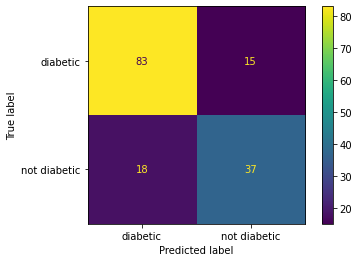

In [65]:
plot_confusion_matrix(rf_clf,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [66]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        98
           1       0.71      0.67      0.69        55

    accuracy                           0.78       153
   macro avg       0.77      0.76      0.76       153
weighted avg       0.78      0.78      0.78       153



# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
gb_y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test,gb_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7843137254901961


In [70]:
gb_params = [{
    'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'min_samples_leaf' : range(1,6)
}]
gb_optimal_params = GridSearchCV(GradientBoostingClassifier(),gb_params,cv =5,verbose = 2)
gb_optimal_params.fit(X_train,y_train)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=1, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.1, min_samples_leaf=2, total= 

[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2, total=   0.3s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=2, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.3, min_samples_leaf=3, total= 

[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=2, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.5, min_samples_leaf=4, total= 

[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=3 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=3, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.7, min_samples_leaf=4, total= 

[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=4 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=4, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5, total=   0.2s
[CV] criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5 ...
[CV]  criterion=friedman_mse, learning_rate=0.9, min_samples_leaf=5, total= 

[CV]  criterion=mse, learning_rate=0.1, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.1, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.1, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.1, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.1, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.2, min_samples_leaf=1 ............
[CV]  criterion=mse, learning_rate=0.2, min_samples_leaf=1, total=   0.3s
[CV] criterion=mse, learning_rate=0.2, min_samples_leaf=1 ............
[CV]  criterion=mse, learning_rate=0.2, min_samples_leaf=1, total=   0.2s
[CV] criterion=mse, learning_rate=0.2, min_samples_leaf=1 ............
[CV]  criterion=mse, learning_rate=0.2, min_samples_leaf=1, total=   0.3s
[CV] criterion=mse, learning_rate=0.2, min_samples_leaf=1 ............
[CV]  criterion=mse, learning_rate=0.2, min_samples_leaf=1, total=   0.2s
[CV] criterion=mse, learning_rate=0.2, min_samples_leaf=

[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=1, total=   0.3s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=2 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=2, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=2 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=2, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=2 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=2, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=2 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=2, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=2 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=2, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=3 ............
[CV]  criterion=mse, learning_rate=0.4, min_samples_leaf=3, total=   0.2s
[CV] criterion=mse, learning_rate=0.4, min_samples_leaf=

[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=3, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=3 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=3, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=3 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=3, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=3 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=3, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=4 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=4, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=4 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=4, total=   0.2s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=4 ............
[CV]  criterion=mse, learning_rate=0.6, min_samples_leaf=4, total=   0.3s
[CV] criterion=mse, learning_rate=0.6, min_samples_leaf=

[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=4, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=4 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=4, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.8, min_samples_leaf=5 ............
[CV]  criterion=mse, learning_rate=0.8, min_samples_leaf=5, total=   0.2s
[CV] criterion=mse, learning_rate=0.9, min_samples_leaf=

[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=1, total=   1.6s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=1, total=   1.6s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=0.1, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=0.1, min_samples_leaf=

[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=3 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=3, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=3 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=3, total=   1.6s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=3 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=3, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=3 ............
[CV]  criterion=mae, learning_rate=0.3, min_samples_leaf=3, total=   1.5s
[CV] criterion=mae, learning_rate=0.3, min_samples_leaf=

[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=3, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=4 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=4, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=4 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=4, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=4 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=4, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=4 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=4, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=4 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=4, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=5 ............
[CV]  criterion=mae, learning_rate=0.5, min_samples_leaf=5, total=   1.5s
[CV] criterion=mae, learning_rate=0.5, min_samples_leaf=

[CV]  criterion=mae, learning_rate=0.7, min_samples_leaf=5, total=   1.6s
[CV] criterion=mae, learning_rate=0.7, min_samples_leaf=5 ............
[CV]  criterion=mae, learning_rate=0.7, min_samples_leaf=5, total=   1.6s
[CV] criterion=mae, learning_rate=0.7, min_samples_leaf=5 ............
[CV]  criterion=mae, learning_rate=0.7, min_samples_leaf=5, total=   1.5s
[CV] criterion=mae, learning_rate=0.7, min_samples_leaf=5 ............
[CV]  criterion=mae, learning_rate=0.7, min_samples_leaf=5, total=   1.5s
[CV] criterion=mae, learning_rate=0.8, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.8, min_samples_leaf=1, total=   1.6s
[CV] criterion=mae, learning_rate=0.8, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.8, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=0.8, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=0.8, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=0.8, min_samples_leaf=

[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=1 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=1, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=2, total=   1.6s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=2 ............
[CV]  criterion=mae, learning_rate=1.0, min_samples_leaf=2, total=   1.5s
[CV] criterion=mae, learning_rate=1.0, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  8.4min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'criterion': ['friedman_mse', 'mse', 'mae'],
                          'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                            0.8, 0.9, 1.0],
                          'min_samples_leaf': range(1, 6)}],
             verbose=2)

In [71]:
print(gb_optimal_params.best_params_)
print(gb_optimal_params.best_score_)

{'criterion': 'mse', 'learning_rate': 0.1, 'min_samples_leaf': 4}
0.762010567673757


In [72]:
gb_clf = GradientBoostingClassifier(criterion = 'mse',learning_rate = 0.1,min_samples_leaf = 4 )
gb_clf.fit(X_train,y_train)
gb_y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test,gb_y_pred)
print("Accuracy score:",accuracy)

Accuracy score: 0.7777777777777778


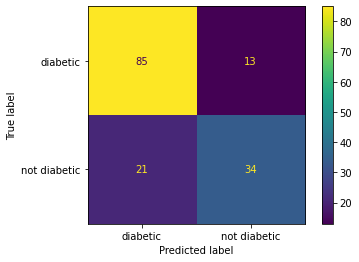

In [74]:
plot_confusion_matrix(gb_clf,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [73]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.72      0.62      0.67        55

    accuracy                           0.78       153
   macro avg       0.76      0.74      0.75       153
weighted avg       0.77      0.78      0.77       153



# KNN Classifier

In [75]:
# Applying Knn and finding the best value of 'k'
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
accuracy_max = 0
k_max = 0
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    train_accuracy = knn.score(X_train,y_train)
    train_scores.append(train_accuracy)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_scores.append(test_accuracy)
    if test_accuracy > accuracy_max:
        accuracy_max = test_accuracy
        k_max = i
print("maximum_test_accuracy:",accuracy_max, "is achieved at k:",k_max)

maximum_test_accuracy: 0.7843137254901961 is achieved at k: 7


In [76]:
knn1 = KNeighborsClassifier(7)
knn1.fit(X_train,y_train)
knn_y_pred = knn1.predict(X_test)

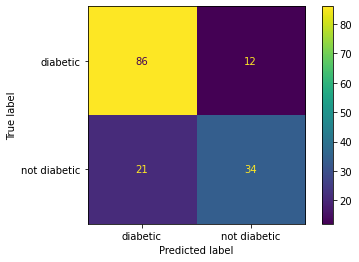

In [77]:
plot_confusion_matrix(knn1,X_test,y_test,values_format = 'd',display_labels = ['diabetic','not diabetic'])

In [78]:
# Hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn2 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn2,param_grid,cv =5,verbose = 2)
knn_cv.fit(X_train,y_train)

print("Best Parameters: " + str(knn_cv.best_params_))
print(knn_cv.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .................................... n_neighbors=3, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] .

[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ................................... n_neighbors=15, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ................................... n_neighbors=16, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ................................... n_neighbors=16, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ................................... n_neighbors=16, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ................................... n_neighbors=16, total=   0.0s
[CV] n_neighbors=16 ..................................................
[CV] ................................... n_neighbors=16, total=   0.0s
[CV] n_neighbors=17 ..................................................
[CV] .

[CV] ................................... n_neighbors=28, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ................................... n_neighbors=28, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ................................... n_neighbors=28, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ................................... n_neighbors=28, total=   0.0s
[CV] n_neighbors=28 ..................................................
[CV] ................................... n_neighbors=28, total=   0.0s
[CV] n_neighbors=29 ..................................................
[CV] ................................... n_neighbors=29, total=   0.0s
[CV] n_neighbors=29 ..................................................
[CV] ................................... n_neighbors=29, total=   0.0s
[CV] n_neighbors=29 ..................................................
[CV] .

[CV] ................................... n_neighbors=39, total=   0.0s
[CV] n_neighbors=39 ..................................................
[CV] ................................... n_neighbors=39, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ................................... n_neighbors=40, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ................................... n_neighbors=40, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ................................... n_neighbors=40, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ................................... n_neighbors=40, total=   0.0s
[CV] n_neighbors=40 ..................................................
[CV] ................................... n_neighbors=40, total=   0.0s
[CV] n_neighbors=41 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    5.9s finished


In [79]:
knn2 = KNeighborsClassifier(n_neighbors = 17)
knn2.fit(X_train,y_train)
y_pred = knn2.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.7843137254901961

Accuracy decreased

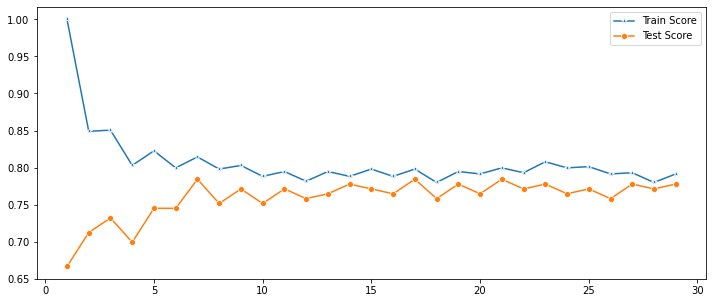

In [80]:
# plotting training and test scores of KNN model
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

We can see that maximum value of k = 17 where the test score is maximum.

Out of the three models, we can observe that "Logistic Regression" worked best in terms of accuracy.

We can plot ROC curve to confirm the same

In [81]:
svc_y_pred_proba = clf_svm2.predict_proba(X_test)[:,1]
lr_y_pred_proba = lr_clf2.predict_proba(X_test)[:,1]
rf_y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
gb_y_pred_proba = gb_clf.predict_proba(X_test)[:,1]
knn_y_pred_proba = knn1.predict_proba(X_test)[:,1]

In [82]:
from sklearn.metrics import roc_curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_y_pred_proba)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_y_pred_proba)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_y_pred_proba)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_y_pred_proba)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_y_pred_proba)

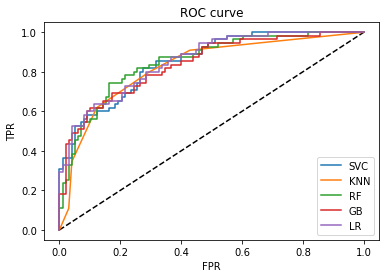

In [83]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svc,tpr_svc, label='SVC')
plt.plot(fpr_knn,tpr_knn, label='KNN')
plt.plot(fpr_rf,tpr_rf, label='RF')
plt.plot(fpr_gb,tpr_gb, label='GB')
plt.plot(fpr_lr,tpr_lr, label='LR')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC curve')
plt.show()

In [84]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test,knn_y_pred_proba)
lr_auc = roc_auc_score(y_test,lr_y_pred_proba)
svc_auc = roc_auc_score(y_test,svc_y_pred_proba)
rf_auc = roc_auc_score(y_test,rf_y_pred_proba)
gb_auc = roc_auc_score(y_test,gb_y_pred_proba)
print("Area under KNN ROC curve:",knn_auc)
print("Area under LR ROC curve:",lr_auc)
print("Area under SVC ROC curve:",svc_auc)
print("Area under RF ROC curve:",rf_auc)
print("Area under GB ROC curve:",gb_auc)

Area under KNN ROC curve: 0.8253246753246752
Area under LR ROC curve: 0.8556586270871985
Area under SVC ROC curve: 0.8519480519480519
Area under RF ROC curve: 0.8506493506493505
Area under GB ROC curve: 0.8382189239332096


Area under Logistic Regression ROC curve is maximum.

# End of the Notebook